# Threshold Adjustment

👇 Load the player `player_performances.csv` dataset to see what you will be working with.

In [61]:
## Your code here
import pandas as pd
data=pd.read_csv("./data/ML_Player_performance.csv")
data

,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers,target_5y
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1325,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1326,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1327,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [62]:
X=data.drop(columns=["target_5y"])
y=data["target_5y"]

In [63]:
data.columns

Index(['games played', 'minutes played', 'points per game', 'field goals made',
       'field goal attempts', 'field goal percent', '3 point made',
       '3 point attempt', '3 point %', 'free throw made',
       'free throw attempts', 'free throw %', 'offensive rebounds',
       'defensive rebounds', 'rebounds', 'assists', 'steals', 'blocks',
       'turnovers', 'target_5y'],
      dtype='object')

ℹ️ Each observations represents a player and each column a characteristic of performance. The target `target_5y` defines whether the player has had a professional career of less than 5 years [0] or 5 years or more [1].

# Preprocessing

👇 To avoid spending too much time on the preprocessing, Robust Scale the entire feature set. This practice is not optimal, but can be used for preliminary preprocessing and/or to get models up and running quickly.

Save the scaled feature set as `X_scaled`.

<AxesSubplot:>

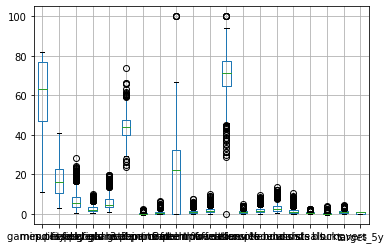

In [64]:
## Your code here
data.boxplot()

(array([ 70., 252., 232., 227., 172., 132.,  92.,  75.,  56.,  21.]),
 array([ 3.1 ,  6.88, 10.66, 14.44, 18.22, 22.  , 25.78, 29.56, 33.34,
        37.12, 40.9 ]),
 <BarContainer object of 10 artists>)

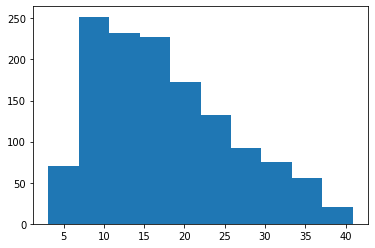

In [65]:
import matplotlib.pyplot as plt
plt.hist(data["minutes played"])

In [67]:
from sklearn.preprocessing import RobustScaler
r_scaler=RobustScaler()
r_scaler.fit(X)
X_scaled=r_scaler.transform(X)

### ☑️ Check your code

In [68]:
from nbresult import ChallengeResult

result = ChallengeResult('scaled_features',
                         scaled_features = X_scaled
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/03-Performance-metrics/03-Threshold-Adjustments
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_scaled_features.py::TestScaled_features::test_scaled_features PASSED [100%]

============================== 1 passed in 0.37s ===============================


💯 You can commit your code:

git add tests/scaled_features.pickle

git commit -m 'Completed scaled_features step'

git push origin master


# Base modelling

🎯 The task is to detect players who will last 5 years minimum as professionals, with a 90% guarantee.

👇 Is a default Logistic Regression model going to satisfy the coach's requirements? Use cross validation and save the score that supports your answer under variable name `base_score`.

In [85]:
## Your code here
# professional career of less than 5 years [0] or 5 years or more [1].
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr_model=LogisticRegression()
lr_result=cross_validate(lr_model,X_scaled,y)
base_score=lr_result["test_score"].mean()


### ☑️ Check your code

In [86]:
from nbresult import ChallengeResult

result = ChallengeResult('base_precision',
                         score = base_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/03-Performance-metrics/03-Threshold-Adjustments
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_base_precision.py::TestBase_precision::test_precision_score PASSED [100%]

============================== 1 passed in 0.37s ===============================


💯 You can commit your code:

git add tests/base_precision.pickle

git commit -m 'Completed base_precision step'

git push origin master


# Threshold adjustment

👇 Find the decision threshold that guarantees a 90% precision for a player to last 5 years or more as a professional. Save the threshold under variable name `new_threshold`.

<details>
<summary>💡 Hint</summary>

- Make cross validated probability predictions with [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)
    
- Plug the probabilities into [`precision_recall_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) to generate precision scores at different thresholds

- Find out which threshold guarantees a precision of 0.9
      
</details>



In [79]:
data.head()

,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers,target_5y
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [106]:
y

0       0
1       0
2       0
3       1
4       1
       ..
1324    0
1325    1
1326    0
1327    1
1328    1
Name: target_5y, Length: 1329, dtype: int64

In [108]:
## Your code here
# professional career of less than 5 years [0] or 5 years or more [1].
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

lr_model=LogisticRegression()

data["proba0"],data["proba_1"]=cross_val_predict(lr_model,X_scaled,y,cv=5,method="predict_proba").T





In [109]:
data["proba0"]

0       0.746860
1       0.614762
2       0.459138
3       0.437555
4       0.459837
          ...   
1324    0.254186
1325    0.461676
1326    0.431523
1327    0.553268
1328    0.618450
Name: proba0, Length: 1329, dtype: float64

In [110]:
data["proba_1"]

0       0.253140
1       0.385238
2       0.540862
3       0.562445
4       0.540163
          ...   
1324    0.745814
1325    0.538324
1326    0.568477
1327    0.446732
1328    0.381550
Name: proba_1, Length: 1329, dtype: float64

In [111]:
#data["target_5y"] is already encoded
precision, recall, threshold = precision_recall_curve(data["target_5y"],
                                                      data["proba_1"]) 

In [117]:
scores = pd.DataFrame({'threshold':threshold,
                       'precision': precision[:-1],
                       'recall':recall[:-1]})# Store in dataframe
scores.head()

,threshold,precision,recall
0,0.076741,0.622926,1.000000
1,0.095612,0.622642,0.998789
2,0.102982,0.623112,0.998789
3,0.106202,0.623583,0.998789
4,0.118598,0.624054,0.998789


### ☑️ Check your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('decision_threshold',
                         threshold = new_threshold
)

result.write()
print(result.check())

# Using the new threshold

🎯 The coach has spotted a potentially interesting player, but wants your 90% guarantee that he would last 5 years minimum as a pro. Download the player's data [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_New_player.csv).

❓ Would you risk recommending the player to the coach? Save your answer as string under variable name `recommendation` as "recommend" or "not recommend".

In [0]:
## Your code here

### ☑️ Check your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('recommendation',
                         recommendation = recommendation
)

result.write()
print(result.check())

# 🏁